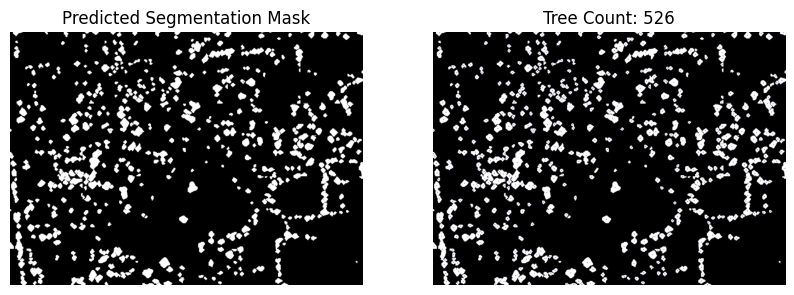

🌳 Total Trees Counted: 526
Tree count mask saved as: /content/drive/MyDrive/mask_file_output/mergeyolov11s_phase-3_output.jpg


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Paths (Update these)
predicted_mask_path = "/content/drive/MyDrive/mask files/mergeyolov11s_phase-3.jpg"
output_tree_mask_path = "/content/drive/MyDrive/mask_file_output/mergeyolov11s_phase-3_output.jpg"

# Load the predicted mask (grayscale)
segmentation_mask = cv2.imread(predicted_mask_path, cv2.IMREAD_GRAYSCALE)
if segmentation_mask is None:
    raise ValueError(f"⚠ Error: Could not load image {predicted_mask_path}")

# Function to count trees using Canopy Method
def count_trees_canopy(segmentation_mask, min_distance=10):
    binary_mask = (segmentation_mask > 0).astype(np.uint8)
    distance = cv2.distanceTransform(binary_mask, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(distance, min_distance, 255, cv2.THRESH_BINARY)
    sure_fg = np.uint8(sure_fg)
    contours, _ = cv2.findContours(sure_fg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    dot_mask = np.zeros_like(segmentation_mask)
    tree_count = 0
    for contour in contours:
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            cv2.circle(dot_mask, (cx, cy), 3, (255), -1)
            tree_count += 1

    return tree_count, dot_mask

# Count trees and create dot mask
tree_count, dot_mask = count_trees_canopy(segmentation_mask)

# Overlay dots on the segmentation mask
overlay_mask = cv2.cvtColor(segmentation_mask, cv2.COLOR_GRAY2BGR)
overlay_mask[dot_mask > 0] = [0, 0, 255]  # Mark trees with red dots

# Save the result as JPG
cv2.imwrite(output_tree_mask_path, overlay_mask)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(segmentation_mask, cmap="gray")
plt.title("Predicted Segmentation Mask")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(overlay_mask)
plt.title(f"Tree Count: {tree_count}")
plt.axis("off")

plt.show()

print(f"🌳 Total Trees Counted: {tree_count}")
print(f"Tree count mask saved as: {output_tree_mask_path}")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
